# 0) Credits
## Tensorflow
A lot of choices are based on the tutorial(s) made by tensorflow.
https://www.tensorflow.org/tutorials/images/classification

# 1) Imports
## packages

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import json
import os
import absl.logging

## datasets

In [2]:
import tensorflow.keras.datasets.cifar10 as cifar10

## Tensorflow

In [3]:
import tensorflow.keras.layers as layers

from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential

# 2) Settings

In [4]:
# Should categorize X_train and X_test
# Replaced by tf.keras.losses.SparseCategoricalCrossentropy
CATEGORIZE_X = False

# Load models/history from files
# Will fail if files do not exist
LOAD_SAVED_MODEL   = False
LOAD_SAVED_HISTORY = False

# Save models/history to file after building
# Will only save of loading is disabled
# (Warning) this will generate files!
SAVE_MODEL   = True
SAVE_HISTORY = True

EPOCHS = 20
BATCH_SIZE = 16

if SAVE_HISTORY:
    os.makedirs(os.path.dirname("histories/"), exist_ok=True)
if SAVE_MODEL:
    absl.logging.set_verbosity(absl.logging.ERROR)

# 3) Loading data

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
num_classes = len(class_names)

In [6]:
print("X_train", X_train.dtype, X_train.shape)
print("X_test ", X_test.dtype,  X_test.shape )
print("y_train", y_train.dtype, y_train.shape)
print("y_test ", y_test.dtype,  y_test.shape )
print("sample ", X_test[0][0][0])

X_train uint8 (50000, 32, 32, 3)
X_test  uint8 (10000, 32, 32, 3)
y_train uint8 (50000, 1)
y_test  uint8 (10000, 1)
sample  [158 112  49]


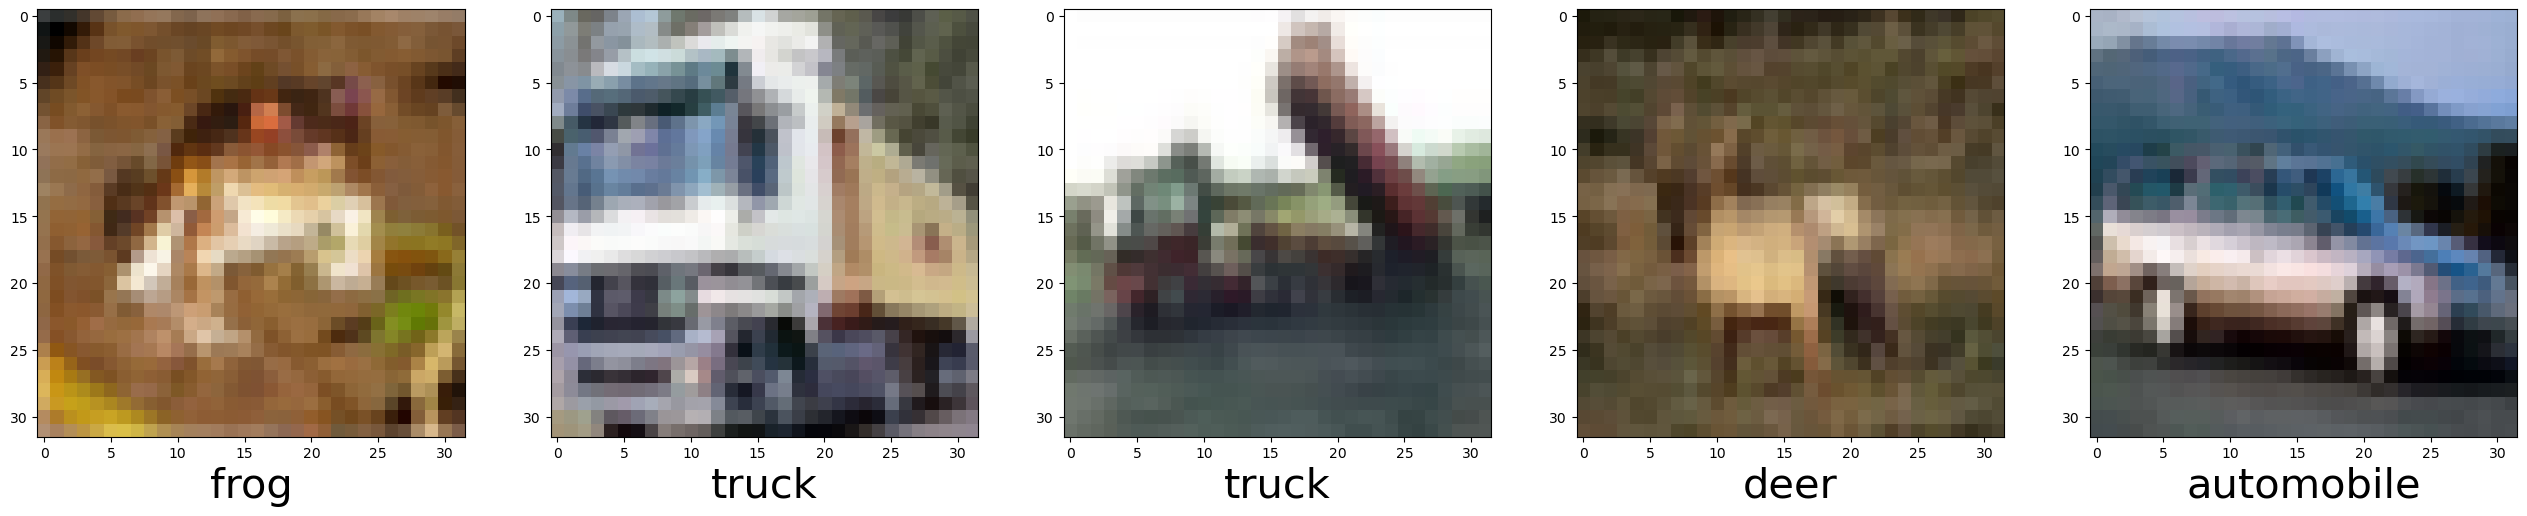

In [7]:
plt.figure(figsize=(32,32))
for i in range(5):
    class_id = y_train[i][0]
    label = class_names[class_id]
    
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(label, fontsize=30)
    
plt.show()

# 4) Data preperation
## Normalisation

In [8]:
before  = X_train[0][0][0]
X_train = np.divide(X_train, 255)
X_test  = np.divide(X_test,  255)
after   = X_train[0][0][0]

print(f"{before=} {after=}")

before=array([59, 62, 63], dtype=uint8) after=array([0.23137255, 0.24313725, 0.24705882])


## Categorisation

In [9]:
if y_train[0].size == 1 and CATEGORIZE_X:
    
    before  = y_train[0][0]
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test  = tf.keras.utils.to_categorical(y_test,  num_classes=num_classes)
    after  = y_train[0]
    
    print(f"{before=} {after=}")

# 5) Helper functions
## Plot history
from https://www.tensorflow.org/tutorials/images/classification#visualize_training_results

In [10]:
def plot_history(history, epochs):
    acc = history['accuracy']
    val_acc = history['val_accuracy']

    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# 5) Neural Network
Before we start making and testing Convolutional Neural Networks we should first test a basis Neural Network, in this case a simple sequential network that flattens the input data ((32,32,3)->(3072)), has a hidden layer of 64 relu activated neurons and an output layer of the amount of classes that exists in this dataset.
## Building the model

In [11]:
if LOAD_SAVED_MODEL:
    model = load_model("models/model5")
else:
    model = Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes),
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training

In [ ]:
# Replace with custom values if needed
epochs = EPOCHS
batch_size = BATCH_SIZE

if LOAD_SAVED_HISTORY:
    file = open("histories/history5", "r")
    history = json.load(file)
else:
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test)).history
    
    if SAVE_MODEL:
        model.save("models/model5")
    if SAVE_HISTORY:
        file = open("histories/history5", "w")
        json.dump(history, file)

plot_history(history, epochs)

Epoch 1/20
3125/3125 [==============================] - 6s 2ms/step - loss: 2.0129 - accuracy: 0.2473 - val_loss: 2.0949 - val_accuracy: 0.2322
Epoch 2/20
3125/3125 [==============================] - 5s 2ms/step - loss: 1.9226 - accuracy: 0.2861 - val_loss: 1.8955 - val_accuracy: 0.3008
Epoch 3/20
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8985 - accuracy: 0.2960 - val_loss: 1.8729 - val_accuracy: 0.3033
Epoch 4/20
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8803 - accuracy: 0.3042 - val_loss: 1.8520 - val_accuracy: 0.3113
Epoch 5/20
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8668 - accuracy: 0.3122 - val_loss: 1.8987 - val_accuracy: 0.2924
Epoch 6/20
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8615 - accuracy: 0.3141 - val_loss: 1.8589 - val_accuracy: 0.3133
Epoch 7/20
 905/3125 [=======>......................] - ETA: 3s - loss: 1.8604 - accuracy: 0.3175

# 6) Convolutional Neural Network
For the first attempt at a CNN I will just put together layers by guessing, as this is a 2d image I will use 2 convolution layers with different sizes. MaxPooling2D is used in pretty much every example of image classification including the one from tensorflow, if I understand correctly this is to reduce noise but i'm not really sure.
## Building the model

In [ ]:
if LOAD_SAVED_MODEL:
    model = load_model("models/model6")
else:
    model = Sequential([
      layers.Conv2D(3, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(6, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(32, activation='relu'),
      layers.Dense(num_classes)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training

In [ ]:
# Replace with custom values if needed
epochs = EPOCHS
batch_size = BATCH_SIZE

if LOAD_SAVED_HISTORY:
    file = open("histories/history6", "r")
    history = json.load(file)
else:
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test)).history
    
    if SAVE_MODEL:
        model.save("models/model6")
    if SAVE_HISTORY:
        file = open("histories/history6", "w")
        json.dump(history, file)

plot_history(history, epochs)

# 7) Expanded CNN
To try and increase the accuracy I will try to expand the network with more Convolutions and a dropout on the last convolution.
## Building the model

In [ ]:
if LOAD_SAVED_MODEL:
    model = load_model("models/model7")
else:
    model = Sequential([
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu'), # Extra layer of convolution
      layers.MaxPooling2D(),
      layers.Dropout(0.2), # Dropout of 20% to prevent overfitting
      layers.Flatten(),
      layers.Dense(32, activation='relu'),
      layers.Dense(num_classes)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training

In [ ]:
# Replace with custom values if needed
epochs = EPOCHS
batch_size = BATCH_SIZE

if LOAD_SAVED_HISTORY:
    file = open("histories/history7", "r")
    history = json.load(file)
else:
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test)).history
    
    if SAVE_MODEL:
        model.save("models/model7")
    if SAVE_HISTORY:
        file = open("histories/history7", "w")
        json.dump(history, file)

plot_history(history, epochs)

# 7) Expanding CNN again
Altough the last CNN was pretty accurate I am going to try improve the score by adding BatchNormalization, An extra Conv2D layer and increasing the size of the second to last Hidden layer. I am also adding padding to keep enough size for the extra convolution layer(s).
## Building the model

In [ ]:
if LOAD_SAVED_MODEL:
    model = load_model("models/model7")
else:
    model = Sequential([
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # Extra layer of convolution
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training

In [ ]:
# Replace with custom values if needed
epochs = EPOCHS
batch_size = BATCH_SIZE

if LOAD_SAVED_HISTORY:
    file = open("histories/history7", "r")
    history = json.load(file)
else:
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test)).history
    
    if SAVE_MODEL:
        model.save("models/model7")
    if SAVE_HISTORY:
        file = open("histories/history7", "w")
        json.dump(history, file)

plot_history(history, epochs)

# 8) Overfitting CNN
In the previous CNN you could see that it was overfitting because the Training and Validation values started to drift to far apart. To try and fix this I will add dropouts to more layers so the network can't overfit as much.
## Building the model

In [ ]:
if LOAD_SAVED_MODEL:
    model = load_model("models/model8")
else:
    model = Sequential([
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Conv2D(32, (3, 3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same'), # Extra layer of convolution
      layers.BatchNormalization(),
      layers.MaxPooling2D(),
      layers.Dropout(0.2),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.4),
      layers.Dense(num_classes)
    ])
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training

In [ ]:
# Replace with custom values if needed
epochs = EPOCHS
batch_size = BATCH_SIZE

if LOAD_SAVED_HISTORY:
    file = open("histories/history8", "r")
    history = json.load(file)
else:
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test)).history
    
    if SAVE_MODEL:
        model.save("models/model8")
    if SAVE_HISTORY:
        file = open("histories/history8", "w")
        json.dump(history, file)

plot_history(history, epochs)

# Conclusion
In the last CNN the overfitting was mostly fixed but the model was not at it's fullest potential but I don't think it would go much higher than 72-75% which was the validation score of the previous model. There are probably more efficient models that exist but witouth way to much testing I don't think I can reach much more accuracy than this.